### Inference with customized model

requires the execution of *./diffusers/examples/text_to_image/0_myscript.sh first*

In [1]:
from diffusers import StableDiffusionPipeline
import torch

model_path = "./diffusers/examples/text_to_image/sd-pokemon-model"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe(prompt="yoda").images[0]
image.save("./diffusers/examples/text_to_image/yoda-pokemon.png")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

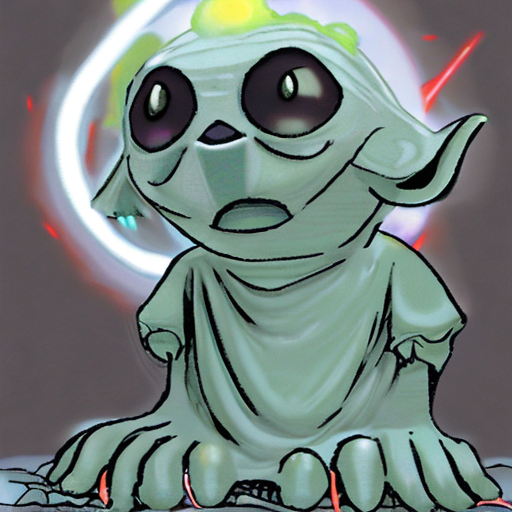

In [2]:
image

  0%|          | 0/50 [00:00<?, ?it/s]

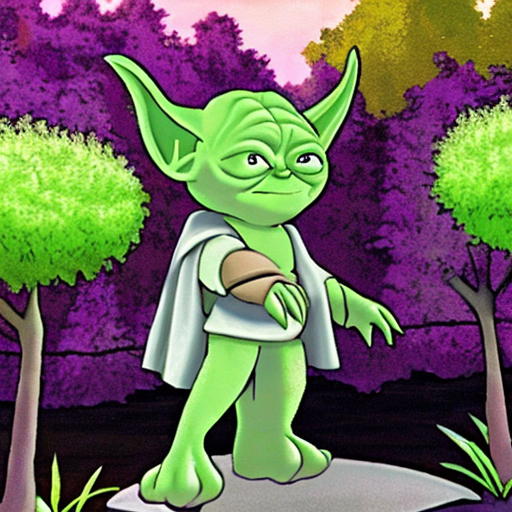

In [3]:
image = pipe(prompt="yoda in a garden").images[0]
image

In [4]:
pipe1 = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base", torch_dtype=torch.float16)
pipe1.to("cuda")
image1 = pipe1(prompt="Yoda in a garden").images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

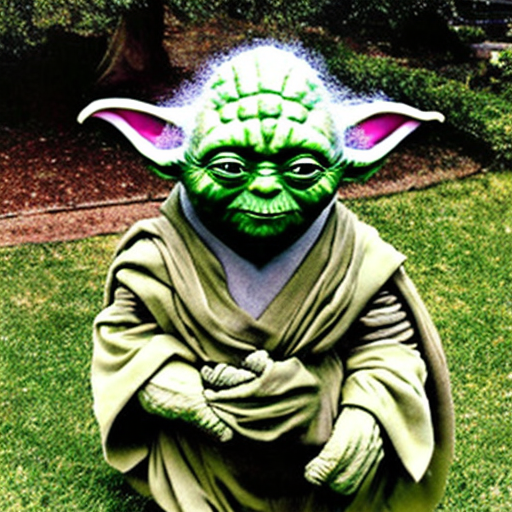

In [5]:
image1

### Custom dataset preparation

What datasets format looks like

In [3]:
from datasets import load_dataset
dataset = load_dataset("lambdalabs/pokemon-blip-captions")
dataset['train'][0]

Using flick8r:  
https://www.kaggle.com/datasets/aladdinpersson/flickr8kimagescaptions  
Renamed the flickr8k to images_folder/train  

Converting the annotations from txt to json:   


In [35]:
import json

def txt_to_json(input_file, output_file):
    with open(input_file, 'r') as file:
        # Skip the first line
        next(file)
        
        with open(output_file, 'w') as json_file:
            for line in file:
                image_path, description = line.strip().split(',', 1)
                description = description.replace("\"", "").strip()
                data = {"file_name": image_path, "text": description}
                
                # Write each entry as a separate JSON object
                json.dump(data, json_file)
                json_file.write('\n')  # Add a newline between entries

txt_to_json('./diffusers/examples/text_to_image/images_folder/train/captions.txt', 'txt2im/diffusers/examples/text_to_image/images_folder/train/metadata.jsonl')


In [36]:
dataset = load_dataset("images_folder", data_dir="train/", split="train", data_files="metadata.jsonl")
dataset[0]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

{'file_name': '1000268201_693b08cb0e.jpg',
 'text': 'A child in a pink dress is climbing up a set of stairs in an entry way .'}

### Inference with customized model trained on custom data
requires the execution of *./diffusers/examples/text_to_image/1_custom_ds.sh first*

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

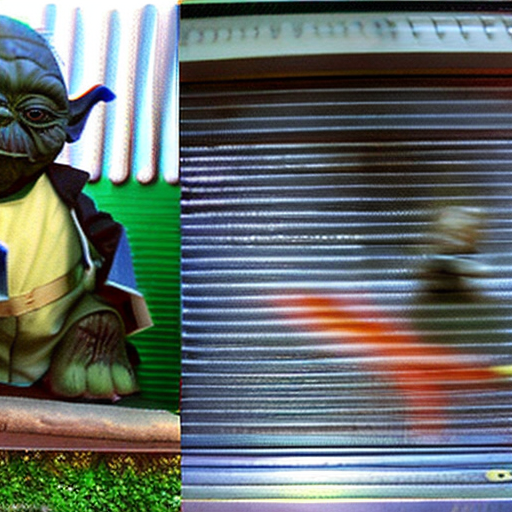

In [1]:
from diffusers import StableDiffusionPipeline
import torch

model_path = "txt2im/diffusers/examples/text_to_image/sd-flickr-model"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe(prompt="yoda").images[0]
image.save("yoda-flickr.png")
image